# Exploratory data Analysis
#### Kaggle Forest Cover Competition

## Kaggle's Data Description

[Link to Data page on Kaggle](https://www.kaggle.com/c/forest-cover-type-prediction/data)

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

Data Fields

* Elevation - Elevation in meters
* Aspect - Aspect in degrees azimuth
* Slope - Slope in degrees
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The soil types are:

1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

## Read Data

Read in the test and the training data. Shove that stuff into pandas.

In [1]:
#Imports and reading data and stuff

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Libraries for reading, cleaning and plotting the dataa
import numpy as np 
import pandas as pd 
import csv
import matplotlib.pyplot as plt


# Libraries for models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# Read in training (+dev) data 
training_data = []
with open('../data/train.csv', newline='') as csvfile:
    train_data = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in train_data:
        training_data.append(row)
            
# Convert to a numpy array of type int (except for the label row)
training_data = np.array(training_data[1:]).astype(int)   

# Read in test data
testing_data = []
with open('../data/test.csv', newline='') as csvfile:
    test_data = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in test_data:
        testing_data.append(row)

# The testing file is huge so only read in max_test_data
# max_test_data = 30001
# test_data = np.array(testing_data[1:max_test_data]).astype(int)        

# The training data is huge, so just read it all. Fuggit!
testing_data = np.array(testing_data[1:]).astype(int) 

In [14]:
#shove it all into a data frame

col_names = (["idx_idx","el_m","asp_deg","slp_deg", "hHyd__", "vHyd__","hRd__","sh9_idx",
              "sh12_idx", "sh15_idx","hFire__","a_1","a_2","a_3","a_4"] + 
              [("s_{:02d}".format(ii+1)) for ii in range(40)] + ["cvr_typ"])
            
df = pd.DataFrame(data=training_data, columns=col_names)

# df_test = pd.DataFrame(data=testing_data, columns=col_names[:-1])

df.head()

# df_test.head()

,idx_idx,el_m,asp_deg,slp_deg,hHyd__,vHyd__,hRd__,sh9_idx,sh12_idx,sh15_idx,...,s_32,s_33,s_34,s_35,s_36,s_37,s_38,s_39,s_40,cvr_typ
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## Overall Data - Check for NAs row counts etc

In [35]:
# get NA values

print("There are {} NA values in the training data".format(df.isna().sum().sum()))
print("There are {} NA values in the test data".format(df.isna().sum().sum()))
    # `.isna()` returns a df with bools the first `.sum()` returns series, second is int 
print()
print("There are {} values in the training data".format(df.count()[0]))
print("There are {} values in the test data".format(df_test.count()[0]))

There are 0 NA values in the training data
There are 0 NA values in the test data

There are 15120 values in the training data
There are 565892 values in the test data


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,asp_ew,asp_ns,jitter,asp_ew_jit,asp_ns_jit
0,0.670229,0.742154,1.058937,0.709730,0.785894
1,-0.521551,0.853220,1.120508,-0.584402,0.956040
2,0.696080,0.717964,1.535083,1.068541,1.102135
3,-0.873312,-0.487161,1.396872,-1.219905,-0.680502
4,0.850904,0.525322,1.595711,1.357796,0.838262


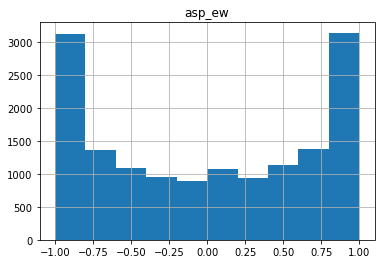

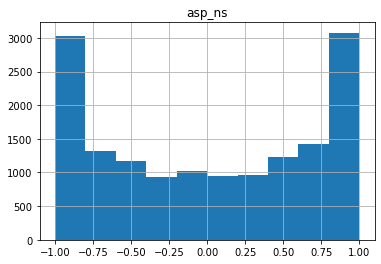

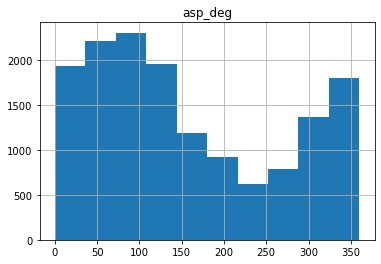

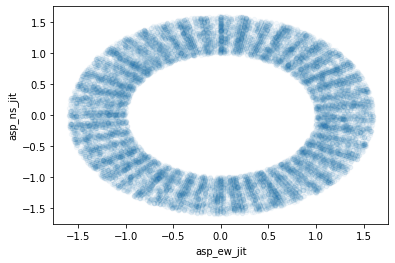

In [87]:
#split the aspect into a N/S and E/W unit vector
df["asp_ew"] = np.sin(df["asp_deg"])
df["asp_ns"] = np.cos(df["asp_deg"])

df["asp_ew"]**2 + df["asp_ns"]**2

df.hist(column = "asp_ew")
df.hist(column = "asp_ns")
df.hist(column = "asp_deg")

df_circle = df[["asp_ew","asp_ns"]]
df_circle["jitter"] = np.random.rand(df.shape[0])*.6 +1
df_circle["asp_ew_jit"] = df_circle["asp_ew"] * df_circle["jitter"]
df_circle["asp_ns_jit"] = df_circle["asp_ns"] * df_circle["jitter"]

df_circle.plot.scatter("asp_ew_jit","asp_ns_jit",alpha=0.04)
df_circle.head()

## Metric variables

#### Findings

* Should change the aspect degrees column to 2 columns each representing the N/S or E/W component of the associated unit vector
* What would happen if we changed the slope in degrees to the more typical rise/run? I feel like it might smooth out the shape so it isn't as bunched.
* Log the hFire__, hRd__, hHydj__ features? it would pull in some of the extreme values.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c29de3c50>]],
      dtype=object)

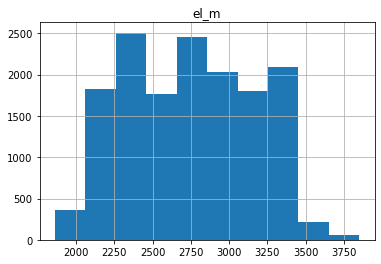

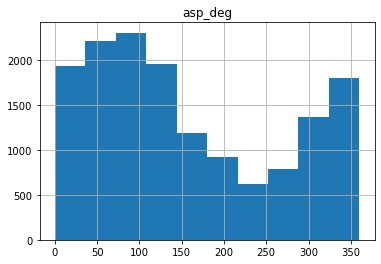

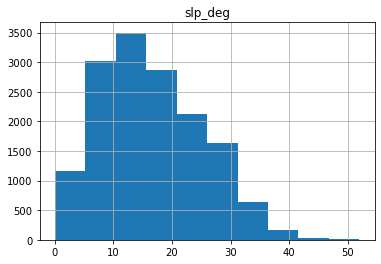

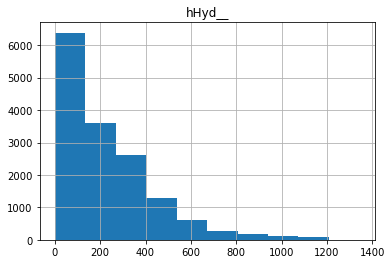

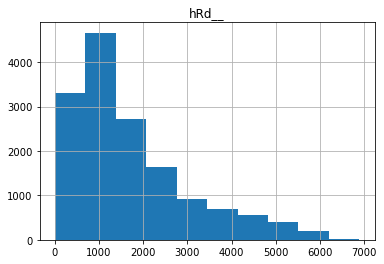

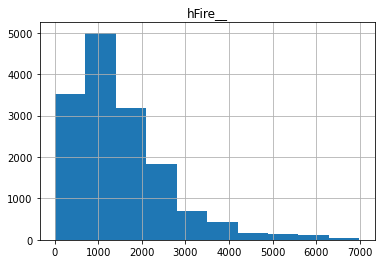

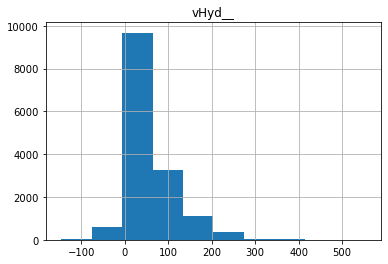

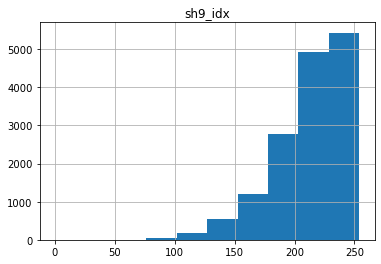

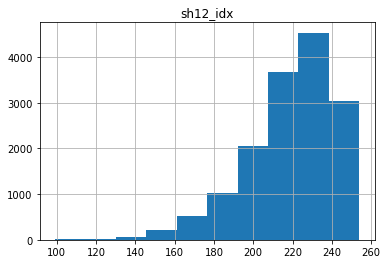

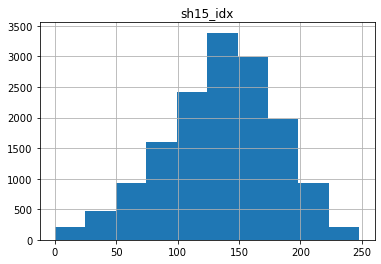

In [33]:
df.hist(column="el_m")
df.hist(column="asp_deg")
df.hist(column="slp_deg")
df.hist(column=["hHyd__"])
df.hist(column=["hRd__"])
df.hist(column="hFire__")       
df.hist(column=["vHyd__"])
df.hist(column=["sh9_idx"])
df.hist(column="sh12_idx")
df.hist(column="sh15_idx")

In [30]:
# Take a look at the distances. Be suspicious of zeros
df.isin([0]).sum()

idx_idx         0
el_m            0
asp_deg       110
slp_deg         5
hHyd__       1590
vHyd__       1890
hRd__           3
sh9_idx         1
sh12_idx        0
sh15_idx       88
hFire__         2
a_1         11523
a_2         14621
a_3          8771
a_4         10445
s_01        14765
s_02        14497
s_03        14158
s_04        14277
s_05        14955
s_06        14470
s_07        15120
s_08        15119
s_09        15110
s_10        12978
s_11        14714
s_12        14893
s_13        14644
s_14        14951
s_15        15120
s_16        15006
s_17        14508
s_18        15060
s_19        15074
s_20        14981
s_21        15104
s_22        14775
s_23        14363
s_24        14863
s_25        15119
s_26        15066
s_27        15105
s_28        15111
s_29        13829
s_30        14395
s_31        14788
s_32        14430
s_33        14504
s_34        15098
s_35        15018
s_36        15110
s_37        15086
s_38        14392
s_39        14463
s_40        14661
cvr_typ   

## Non-Metric Variables

look at some non-metric variables

#### Findings

* We have almost nothing from area 2 (Neota Wilderness area)

Max Number of areas: 1
Min Number of areas: 1


,a_1,a_2,a_3,a_4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


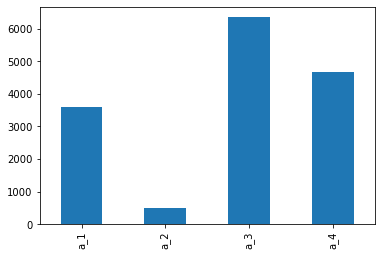

In [31]:
area_df = df[["a_1","a_2","a_3","a_4"]]

area_df.sum(axis=0).plot.bar()

print("Max Number of areas: {}".format(area_df.sum(axis=1).max()))
print("Min Number of areas: {}".format(area_df.sum(axis=1).min()))

area_df.head()

The type of soil that occurs least is 's_07'. It occurs 0 times
The type of soil that occurs most is 's_10'. It occurs 2142 times

This is a series of all soil types that occur zero times in the training data
s_07    0
s_15    0
dtype: int64
1
1


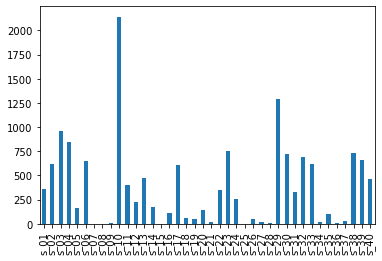

In [32]:
soil_df = df[["s_{:02d}".format(ii+1) for ii in range(40)]]
soil_df.head()

soil_counts = soil_df.sum(axis=0)
soil_counts.plot.bar()
print("The type of soil that occurs least is '{0}'. It occurs {1} times"
      .format(soil_counts.idxmin(),soil_counts.min()))
print("The type of soil that occurs most is '{0}'. It occurs {1} times\n"
      .format(soil_counts.idxmax(),soil_counts.max()))

print("This is a series of all soil types that occur zero times in the training data")
print(soil_counts[soil_counts == 0])

ntypes = soil_df.sum(axis=1)
print(ntypes.max())
print(ntypes.min())


* `pd.DataFrame.hist()` documentaiton
  * https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
* `pd.DataFrame()` documentation
  * https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
* `pd.Series()` documentation <-- This gets returned by some dataframe calls
  * https://pandas.pydata.org/pandas-docs/stable/reference/series.html
* Stack overflow on finding NA values in a dataframe
  * https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe/26266451#26266451
* Numpy random number generator
  * https://numpy.org/doc/stable/reference/random/generator.html